### $X_t = c +\epsilon_t + F(X_{t-1},X_{t-2},X_{t-3}...,u_{t-1},u_{t-2},u_{t-3}...)$

### $F(x,u) = F_x(x)+F_u(x)u$

### $x_{t+\Delta} = x_t + A(x_t)x_t + F_x(x_t)\Delta + B(x_t)u_t + \epsilon_t$

### $x_{t+1} = x_t + g(x_t) + B(x_t)u_t + \epsilon_t$

### $x_{t+1} = f(x_t) + B(x_t)u_t + \epsilon_t$

### $X_{t+1}-X_{t} = \Delta X = W_g\Phi(X_t) + \epsilon_t$

### $W_g \approx (\Phi(X_t)^T\Phi(X_t))^{-1}\Phi(X_t)^T\Delta X$

### $\underset{C}{\operatorname{argmin}} = \displaystyle\sum_{i=1}^{r} \displaystyle\sum_{x\in C_i} ||x-c_i||^2$

### $\sigma_i^2 = \frac{1}{r}\displaystyle\sum_{j=1}^{r}||c_i-c_j||^2$

### $\frac{dx}{dt} = f(x,u) + \epsilon$

### $\frac{x_{t+\Delta}-x_t}{\Delta} = F(x_t,u_t) + \epsilon_t$

### $x_{t+\Delta}-x_t = F(x_t,u_t)\Delta + \epsilon_t\Delta$

### $X_{t+1}-X_{t} = \Delta X = W_g\Phi(X_t) + \epsilon_t$

### $
\Phi(Xt) = 
\begin{bmatrix}
    \vert & & \vert \\
    \phi_1(X_t)   & ...& \phi_r(X_t)   \\
    \vert & & \vert
\end{bmatrix}
$

# $x_{t+1} = x_t + g(x_t) + \epsilon_t$
# $g(x_t) = W_g\phi(x_t)-e^{-\tau^2}x_t$

## $x_{t+1} = x_t + g(x_t) + B(x_t)u_t + \epsilon_t$

## Interpretable NL Dynamics

http://papers.nips.cc/paper/6543-interpretable-nonlinear-dynamic-modeling-of-neural-trajectories.pdf

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from RBFN import RBFN
%matplotlib inline


In [7]:
pwd

'/Users/Macintosh/Desktop/Princeton_2019Summer/StatisticModel/Project'

In [8]:
cd '/Users/Macintosh/Desktop/NEU502B_fMRI/502-S02/niix/R1_S2_firstlevel.feat/ROIs/'

[Errno 2] No such file or directory: '/Users/Macintosh/Desktop/NEU502B_fMRI/502-S02/niix/R1_S2_firstlevel.feat/ROIs/'
/Users/Macintosh/Desktop/Princeton_2019Summer/StatisticModel/Project


In [9]:
cc = np.loadtxt('R1-V1L.txt')
dF = (cc/np.min(cc)) * 100 - 100
plt.plot(dF)

OSError: R1-V1L.txt not found.

## Proof of concept

In [10]:
x = np.linspace(0,10,100)
y1 = np.sin(x) + np.random.rand(len(x))
y2 = np.cos(x) + np.random.rand(len(x))
y = np.concatenate((np.expand_dims(y1,axis=1),np.expand_dims(y2,axis=1)),axis=1)
model = RBFN(input_shape = 2, hidden_shape = 10)
model.fit(x,y)
y_pred = model.predict(x)


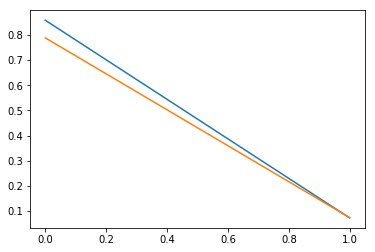

In [11]:
plt.plot(model.predict(np.array([0.5,-0.5])))

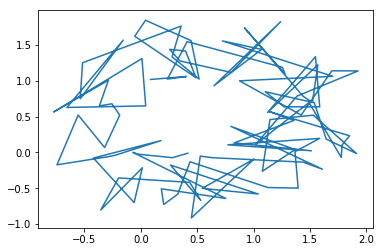

In [12]:
plt.plot(y1,y2)

Text(0.5, 1.0, 'Interpolation using a RBFN')

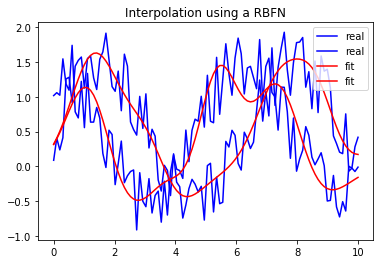

In [13]:
plt.plot(x,y,'b-',label='real')
plt.plot(x,y_pred,'r-',label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
#plt.ylim((-3,3))

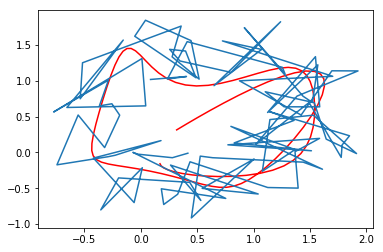

In [15]:
plt.plot(y_pred[:,0],y_pred[:,1],'r')
#plt.hold(True)
plt.plot(y1,y2)

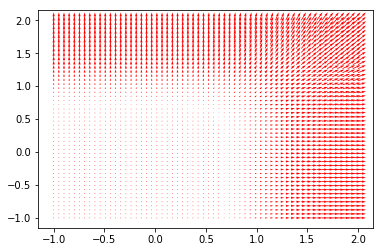

In [16]:
xx = np.linspace(-1, 2, 60)
yy = np.linspace(-1, 2, 50)

X, Y = np.meshgrid(xx, yy)

t = 0

vs, ws = np.zeros(X.shape), np.zeros(Y.shape)

NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        xt = X[i, j]
        yt = Y[i, j]
        yprime = model.predict(np.array([xt, yt]))
        vs[i,j] = yprime[0,0]-yprime[0,1]
        ws[i,j] = yprime[1,0]-yprime[1,1]
     

Q = plt.quiver(X, Y, vs, ws, color='r')



## Nonlinear cases

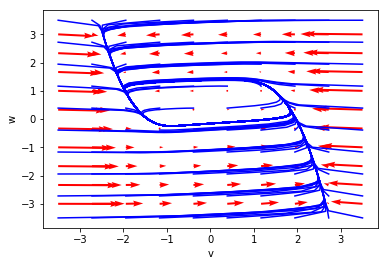

In [17]:
I = 0.5
dt = .1
def FHN(uw, t, I=0.5):
    v, w = uw
    dv = ((v - v**3/3 - w) + I)*dt
    dw = (0.08*(v+0.7-0.8*w))*dt
    return dv, dw

xx = np.linspace(-3.5, 3.5, 10)
yy = np.linspace(-3.0, 3.0, 10)

X, Y = np.meshgrid(xx, yy)

t = 0

vs, ws = np.zeros(X.shape), np.zeros(Y.shape)

NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        xt = X[i, j]
        yt = Y[i, j]
        yprime = FHN([xt, yt], t, I)
        vs[i,j] = yprime[0]
        ws[i,j] = yprime[1]
     

Q = plt.quiver(X, Y, vs, ws, color='r',scale_units='xy',scale=1)

plt.xlabel('v')
plt.ylabel('w')


from scipy.integrate import odeint
l = np.linspace(-3.5, 3.5, 10) #[-2.,-1.0,0,1,2.0]
for y20 in l:
    for y10 in l:
        tspan = np.linspace(0, 1000, 200)
        y0 = [y10, y20]
        ys = odeint(FHN, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
    # plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    # plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

#plt.xlim([-3, 3])
#plt.ylim([-3,3])


In [18]:
from sklearn.cluster import KMeans

vn = X+vs
wn = Y+ws
kmeans_v = KMeans(n_clusters=5, random_state=0).fit(vn.reshape(-1, 1))
kmeans_w = KMeans(n_clusters=5, random_state=0).fit(wn.reshape(-1, 1))
kmeans_vw = KMeans(n_clusters=10, random_state=0).fit(np.hstack((vn.reshape(-1, 1), wn.reshape(-1,1))))

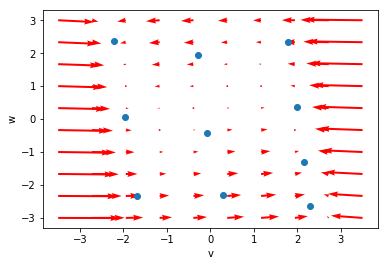

In [20]:
#cV, cW = np.meshgrid(kmeans_v.cluster_centers_,kmeans_w.cluster_centers_)
#plt.imshow(cV)
#plt.colorbar()

Q = plt.quiver(X, Y, vs, ws, color='r',scale_units='xy',scale=1)
plt.xlabel('v')
plt.ylabel('w')

#plt.hold(True)
#plt.scatter(kmeans_v.cluster_centers_, kmeans_w.cluster_centers_);
plt.scatter(kmeans_vw.cluster_centers_[:,0], kmeans_vw.cluster_centers_[:, 1]);

In [21]:
plt.imshow(cW)
plt.colorbar()
kmeans.cluster_centers_

NameError: name 'cW' is not defined

Text(0, 0.5, 'v/w')

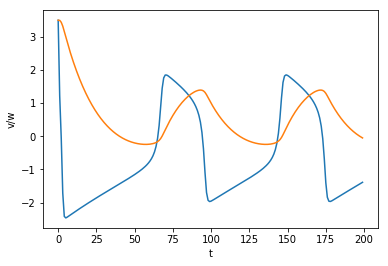

In [23]:
plt.plot(ys[:,0])
#plt.hold(True)
plt.plot(ys[:,1])

plt.xlabel('t')
plt.ylabel('v/w')

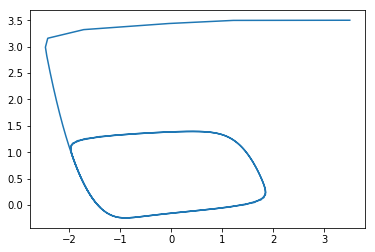

In [24]:
plt.plot(ys[:,0],ys[:,1])

Text(0.5, 1.0, 'Interpolation using a RBFN')

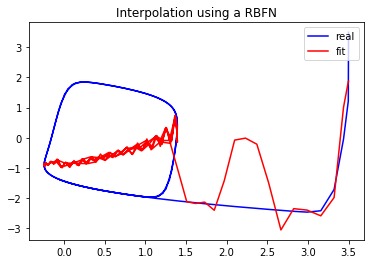

In [25]:
model = RBFN(input_shape = 2, hidden_shape = 50, sigma = 30)
model.fit(ys[:,1],ys[:,0])
y_pred = model.predict(ys[:,1])

plt.plot(ys[:,1],ys[:,0],'b-',label='real')
plt.plot(ys[:,1],y_pred,'r-',label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')

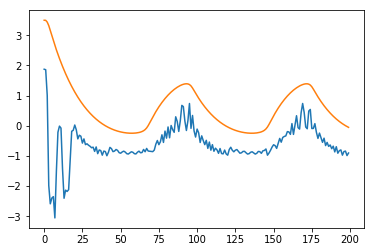

In [26]:
plt.plot(y_pred)
plt.plot(ys[:,1])

In [27]:
from RBFN_opt import RBFN_opt
dir(RBFN_opt)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_interpolation_matrix',
 '_kernel_function',
 'fit',
 'loss_function',
 'optheta']

In [43]:
(new_c, grids, iteration, 10, 2)

G = np.zeros((grids.shape[1], 10))
#for data_point_arg, data_point in enumerate(X):
#    for center_arg, ci in enumerate(center):
#        G[data_point_arg,center_arg] = _kernel_function(ci, center, data_point)
G.shape

(100, 10)

In [209]:
from sklearn.cluster import KMeans

def sigma_mean(center):  ###can be a learned parameter in the future too, here using the mean of centroids first
    sigma = np.mean(sp.spatial.distance.pdist(center))
    return sigma

def _kernel_function(ci, center, data_point):  #radial basis function
    return np.exp(-(1/2*(sigma_mean(center))**2) * np.linalg.norm(ci-data_point)**2)

def _calculate_interpolation_matrix(center, X, hidden_shape):
    G = np.zeros((X.shape[0], hidden_shape))
    for data_point_arg, data_point in enumerate(X):
        for center_arg, ci in enumerate(center):
            G[data_point_arg,center_arg] = _kernel_function(ci, center, data_point)
    return G/(G.sum()+10**-7)

# def fit(center,X,Y,hidden_shape, G):
# #     random_args = np.random.permutation(X.shape[0]).tolist()
# #     if center.any() == None:
# #         center = [X[arg] for arg in random_args][:hidden_shape]  
# #     G = _calculate_interpolation_matrix(center, X, hidden_shape)
#     weights = np.dot(np.linalg.pinv(G),Y)  ###linear regression for weights
#     return weights

def RBFN_MSE(center, X, Y, hidden_shape, dim):  #calculating MSE of the recontructed traces, optimizing 'center'
    center = np.reshape(center,(hidden_shape,dim)) ###important for optimization!!
    G = _calculate_interpolation_matrix(center,X,hidden_shape)
    weights = np.dot(np.linalg.pinv(G),Y)
    prediction = np.dot(G, weights)  #fit(center, X, Y, hidden_shape, G))
    MSE = np.linalg.norm(prediction - Y)**2
    return MSE

In [270]:
kk = np.array([[1,2,3],[3,2,1]])
kk.sum()

12

In [208]:
#RBFN_MSE(kmeans_vw.cluster_centers_,ys[:,1],ys[:,0],10,2)
RBFN_MSE(np.random.rand(10,2),ys[:,1],ys[:,0],10,2)

766.83872301137706

In [136]:
kk = kmeans_vw.cluster_centers_

bnds = ((-3, 3),) * 20
bnds
x0

array([[-0.10291446],
       [-0.4215619 ],
       [-0.30300754],
       [ 1.95496296],
       [ 1.96343621],
       [ 0.35546667],
       [ 2.26343621],
       [-2.62533333],
       [-1.70343621],
       [-2.33146667],
       [ 1.76343621],
       [ 2.34266667],
       [-2.24310606],
       [ 2.36470303],
       [-1.99252743],
       [ 0.05255111],
       [ 0.26333333],
       [-2.3128    ],
       [ 2.13010288],
       [-1.30053333]])

In [20]:
x0 = np.reshape(kmeans_vw.cluster_centers_,(-1,1))  ###since 'sp.optimization' reshapes like this
bnds = ((-3, 3),) * 20  #to speed up computaion
res = sp.optimize.minimize(RBFN_MSE, x0, args=(ys[:,1], ys[:,0], 10, 2), bounds=bnds)

In [210]:
kmeans_vw = KMeans(n_clusters=10, random_state=0).fit(np.hstack((vn.reshape(-1, 1), wn.reshape(-1,1))))
x0 = np.reshape(kmeans_vw.cluster_centers_,(-1,1))  ###since 'sp.optimization' reshapes like this
grids = np.concatenate((X.reshape(-1, 1).T,Y.reshape(-1, 1).T),axis=0).T
iteration = np.concatenate((vs.reshape(-1, 1).T, ws.reshape(-1,1).T)).T
bnds = ((-3, 3),) * 20  #to speed up computaion

res = sp.optimize.minimize(RBFN_MSE, x0, args=(grids, iteration, 10, 2), bounds=bnds)

In [21]:
res.x

array([ 1.59707621,  1.0717734 ,  0.56077352,  2.14200144,  2.11420585,
        0.61638058,  2.36410396, -2.69091628, -1.31643777, -2.21181049,
       -1.91642894, -1.47416977, -1.95111173,  2.50478685, -1.78358138,
        0.25364982,  0.35279178, -2.06613346, -1.10924227, -3.        ])

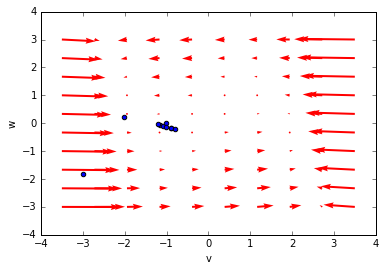

In [183]:
new_c = np.reshape(res.x,(10,2))
Q = plt.quiver(X, Y, vs, ws, color='r',scale_units='xy',scale=1)
plt.xlabel('v')
plt.ylabel('w')

plt.hold(True)
#plt.scatter(kmeans_v.cluster_centers_, kmeans_w.cluster_centers_);
plt.scatter(new_c[:,0], new_c[:, 1]);

In [198]:
pwd

'/Users/Macintosh/Desktop/Princeton-Fall2017/StatisticModel/Project'

In [245]:
def fit_pred(center,X,Y,hidden_shape):
#     random_args = np.random.permutation(X.shape[0]).tolist()
#     if center.any() == None:
#         center = [X[arg] for arg in random_args][:hidden_shape] 
    G = _calculate_interpolation_matrix(center, X, hidden_shape)
    weights = np.dot(np.linalg.pinv(G),Y)  ###linear regression for weights
    prediction = np.dot(G, weights)
    return weights, prediction

In [259]:
nn = 30
kmeans_vw = KMeans(n_clusters=nn, random_state=0).fit(np.hstack((vn.reshape(-1, 1), wn.reshape(-1,1))))

grids = np.concatenate((X.reshape(-1, 1).T,Y.reshape(-1, 1).T),axis=0).T
iteration = np.concatenate((vs.reshape(-1, 1).T, ws.reshape(-1,1).T)).T
Wg, pred = fit_pred(kmeans_vw.cluster_centers_, grids, iteration, nn)
#Wg, pred = fit_pred(np.random.randn(nn,2), grids, iteration, 10)

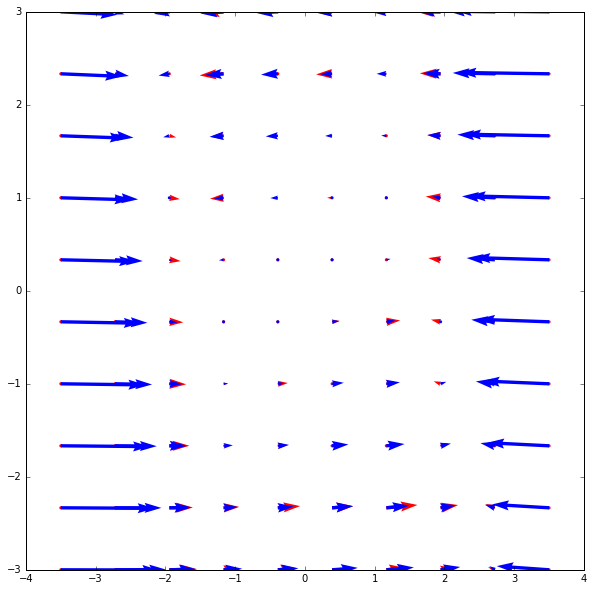

In [260]:
plt.figure(figsize=(10,10))
Q = plt.quiver(X, Y, np.reshape(pred[:,0],(10,10)), np.reshape(pred[:,1],(10,10)), color='r',scale_units='xy',scale=1)
plt.hold(True)
plt.quiver(X, Y, np.reshape(iteration[:,0],(10,10)), np.reshape(iteration[:,1],(10,10)), color='b',scale_units='xy',scale=1)
#plt.quiver(X, Y, vs,ws,color='b',scale_units='xy',scale=1)


In [261]:
def pred(xt, center, Wg,  hidden_shape):
#     random_args = np.random.permutation(X.shape[0]).tolist()
#     if center.any() == None:
#         center = [X[arg] for arg in random_args][:hidden_shape] 
    G = _calculate_interpolation_matrix(center, xt, hidden_shape)
    prediction = np.dot(G, Wg)
    return prediction

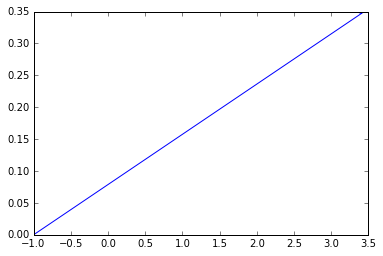

In [267]:
ini = np.array([-1,-0])
tL = 100
pred_vw = np.zeros((tL,2))
pred_vw[0,:] = ini
for tt in range(0,tL-1):
    preds = pred(pred_vw[tt,:], kmeans_vw.cluster_centers_, Wg, nn)
    pred_vw[tt+1,:] = pred_vw[tt,:] + preds[0,:]

plt.plot(pred_vw[:,0],pred_vw[:,1])

In [263]:
preds

array([[-0.04310487,  0.00097064],
       [-0.04310487,  0.00097064]])

In [32]:
pwd


'/Users/Macintosh/Downloads'

In [1]:
cd '/Users/Macintosh/Downloads'

/Users/Macintosh/Downloads


In [4]:
import pickle
example_dict = pickle.load(open( "res_10.p", "rb"))
print(example_dict)

TypeError: __init__() missing 2 required positional arguments: 'sk' and 'yk'

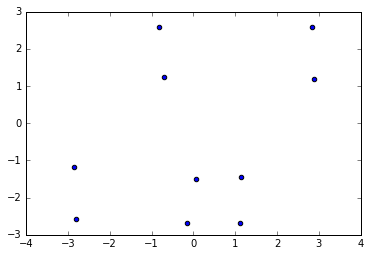

In [10]:
ces = np.array([ 0.06996478, -1.50444843, -0.70663262,  1.25418577, -0.14245848,
       -2.68038752, -0.81425346,  2.59187653,  1.13772319, -1.43521514,
        2.8373877 ,  2.57743668, -2.84948504, -1.1869778 ,  2.89178879,
        1.17562642,  1.12136999, -2.67443031, -2.80339964, -2.58534002])
new_c = np.reshape(ces,(10,2))

plt.scatter(new_c[:,0], new_c[:, 1]);

# Lorenz Attractor!

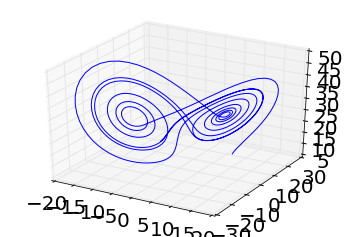

In [104]:
def Lorenz(xyz, dt):
    x, y, z = xyz
    dx = (10*(y-x))*dt
    dy = (x*(28-z)-y)*dt
    dz = (x*y-(8/3)*z)*dt
    return dx,dy,dz

T = 1000
dt = 0.01
tr = np.zeros((3,T))
tr[:,0] = [10,10,10]#np.random.randn(3)
for tt in range(T-1):
    dx,dy,dz = Lorenz(tr[:,tt], dt)
    tr[:,tt+1] = tr[:,tt]+[dx,dy,dz]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(tr[0,:], tr[1,:], tr[2,:], '-b')

In [3]:
def Lorenz(xyz, dt):
    """
    Lorenz attractor in 3-D with parameters from the paper
    """
    x, y, z = xyz
    dx = (10*(y-x))*dt
    dy = (x*(28-z)-y)*dt
    dz = (x*y-(8/3)*z)*dt
    return dx,dy,dz

def Lorenz_sample(xyz_samp, dt, stps):
    """
    Sample trajectories from the FHN model iterations
    vv and ww are sampled initial positions
    time step dt and steps stps are the specified
    """
    stps = stps+1
    xsamp, ysamp, zsamp = xyz_samp
    xs, ys, zs = np.zeros(xsamp.shape+(stps,)), np.zeros(ysamp.shape+(stps,)), np.zeros(zsamp.shape+(stps,))
    NI, NJ, NK = xsamp.shape[0], ysamp.shape[0], zsamp.shape[0]
    for i in range(NI):
        for j in range(NJ):
            for k in range(NK):
                tspan = np.linspace(0, dt*stps, stps)
                trac = np.zeros((len(tspan),3))
                trac[0,:] = [xsamp[i, j, k], ysamp[i, j, k], ysamp[i, j, k]]
                for tt in range(stps-1):       
                    dx, dy, dz = Lorenz(trac[tt,:], dt)
                    trac[tt+1,:] = trac[tt,:] + [dx, dy, dz]
                    
                    xs[i,j,k,:] = trac[:,0]
                    ys[i,j,k,:] = trac[:,1]
                    zs[i,j,k,:] = trac[:,2]
    return np.squeeze(xs), np.squeeze(ys), np.squeeze(zs)

In [4]:
from sklearn.cluster import KMeans

def ini_centroids_Lorenz(xx,yy,zz,n_RBF):
    kmeans_vw = KMeans(n_clusters = n_RBF, random_state=0).fit(np.hstack((xx.reshape(-1, 1), yy.reshape(-1,1), zz.reshape(-1,1))))
    sigma_mean = np.mean(sp.spatial.distance.pdist(kmeans_vw.cluster_centers_))
    centroids_i = kmeans_vw.cluster_centers_
    return centroids_i, sigma_mean

In [5]:
###Parameters for sampling from the model
dt = 0.01  #time step
stps = 200  #increase in the future to sample whole trajectory
sample_trs = 5  #would sample (sample_trs)**3 initial conditions in a 3D case, can be modified as pseudo-random sampling
xyz_samp = np.meshgrid(np.linspace(-20, 20, sample_trs), np.linspace(-20, 20, sample_trs), np.linspace(10, 50, sample_trs)) #the range -3 to 3 is reasonable for the model


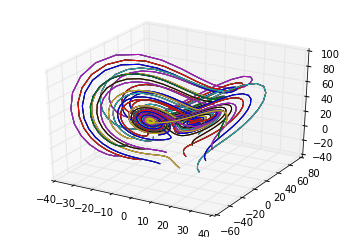

In [6]:
ax = plt.axes(projection='3d')
xx, yy, zz = Lorenz_sample(xyz_samp, dt, stps)
for i in range(xx.shape[0]):
    for j in range(yy.shape[0]):
        for k in range(zz.shape[0]):
            ax.plot(np.squeeze(xx[i,j,k,:]),np.squeeze(yy[i,j,k,:]),np.squeeze(zz[i,j,k,:]))
            ax.hold(True)

In [86]:
###Parameters for the centroids
# Kmeans for the centers and the sigmoids 
n_RBF = 50  #number of radial basis functions in the network
dim = 3  #FHN is 2-D

###visualize the centroids... probably later in 3-D
centroids_i, sigma_mean = ini_centroids_Lorenz(xx,yy,zz,n_RBF)

In [7]:
###RBFN functions

def sigma_avg(center):  ###can be a learned parameter in the future too, here just using the mean of centroids first
    sigma = np.mean(sp.spatial.distance.pdist(center))
    return sigma

def _kernel_function(ci, center, data_point):  #radial basis function
    #return np.exp((-sigma_avg(center)) * (np.linalg.norm(ci-data_point)**2))
    return np.exp(-1/(2*sigma_avg(center)**2) * np.linalg.norm(ci-data_point)**2)  ###shouldn't RBF be like this??

# def _calculate_interpolation_matrix(center, X, hidden_shape):
#     G = np.zeros((X.shape[0], hidden_shape))
#     for data_point_arg, data_point in enumerate(X):
#         for center_arg, ci in enumerate(center):
#             G[data_point_arg,center_arg] = _kernel_function(ci, center, data_point)
#     #return G
#     return (G.T/(G.sum(1)+10**-7)).T   ###should be normalized??
def _calculate_interpolation_matrix(center, X, hidden_shape):
    """ Rachel's optimized version with 0 for loops B) """
    diff = np.einsum('ij,ij->i',center,center)[:,None] + np.einsum('ij,ij->i',X,X) - 2*np.dot(center,X.T)

    G = np.exp(-1/(2*sigma_avg(center)**2) * diff.T)
    return (G.T/(G.sum(1)+10**-7)).T ###should be normalized??

def RBFN_MSE(center, X, Y, hidden_shape, dim):  #calculating MSE of the recontructed traces, optimizing 'center'
    center = np.reshape(center,(hidden_shape,dim)) ###important for optimization!!
    G = _calculate_interpolation_matrix(center,X,hidden_shape)
    weights = np.dot(np.linalg.pinv(G),Y)
    prediction = np.dot(G, weights)  #fit(center, X, Y, hidden_shape, G))
    MSE = np.linalg.norm(prediction - Y)**2
    return MSE

In [9]:
###pre-processing for optimization function~
x0 = np.reshape(centroids_i,(-1,1))  ###since 'sp.optimization' reshapes like this!!!!!
xxo = xx[:,:,:,:-1]
xxn = xx[:,:,:,1:]
yyo = yy[:,:,:,:-1]
yyn = yy[:,:,:,1:]
zzo = zz[:,:,:,:-1]
zzn = zz[:,:,:,1:]
grids = np.concatenate((xxo.reshape(-1, 1).T, yyo.reshape(-1, 1).T, zzo.reshape(-1, 1).T)).T  #xt in the equation
iteration = np.concatenate((xxn.reshape(-1, 1).T-xxo.reshape(-1, 1).T, yyn.reshape(-1,1).T-yyo.reshape(-1, 1).T, zzn.reshape(-1,1).T-zzo.reshape(-1, 1).T)).T  #delta x in the equation
bnds = ((-100, 100),) * (n_RBF*dim)  #to speed up computaion (dynamic range of FHN)


In [10]:
###optimization!!!
res = sp.optimize.minimize(RBFN_MSE, x0, args=(grids, iteration, n_RBF, dim), bounds=bnds, options=dict({'maxiter':100}))

In [11]:
opt_centroids = res.x
opt_c = np.reshape(opt_centroids,(n_RBF,dim))

In [11]:
###fiting function for RBFnetwork
def fit_pred(center,X,Y,hidden_shape, dim):
    G = _calculate_interpolation_matrix(center, X, hidden_shape)
    weights = np.dot(np.linalg.pinv(G),Y)  ###linear regression for weights
    prediction = np.dot(G, weights)
    return weights, prediction

In [47]:
###Parameters for the centroids
# Kmeans for the centers and the sigmoids 
n_RBF = 25  #number of radial basis functions in the network
dim = 3  #FHN is 2-D

###visualize the centroids... probably later in 3-D
centroids_25, sigma_mean = ini_centroids_Lorenz(xx,yy,zz,n_RBF)

In [87]:
###fitting with example trajectories

xxi = xx[:,:,:,:-1] #intial positions
xxd = np.diff(xx) #differential predicted
yyi = yy[:,:,:,:-1]
yyd = np.diff(yy)
zzi = zz[:,:,:,:-1]
zzd = np.diff(zz)
Xt = np.concatenate((xxi.reshape(-1, 1).T, yyi.reshape(-1,1).T, zzi.reshape(-1,1).T)).T  #'design matrix' with initial positions
dX = np.concatenate((xxd.reshape(-1, 1).T, yyd.reshape(-1,1).T, zzd.reshape(-1,1).T)).T  #trained with the iterated differentials

Wg, pred = fit_pred(centroids_i, Xt, dX, n_RBF, dim)
MSE1 = np.linalg.norm(pred - dX)**2
print('k-means: ', MSE1)
nWg, pred = fit_pred(np.random.randn(n_RBF,dim), Xt, dX, n_RBF, dim)  #random RBF centroids perform much worse in terms of MSE minimization
MSE2 = np.linalg.norm(pred - dX)**2
print('random: ', MSE2)
###
nWg, pred = fit_pred(centroids_25, Xt, dX, 25, dim)  #random RBF centroids perform much worse in terms of MSE minimization
MSE3 = np.linalg.norm(pred - dX)**2
print('25: ', MSE3)
optWg, pred = fit_pred(opt_c, Xt, dX, n_RBF, dim)
MSE4 = np.linalg.norm(pred - dX)**2
print('optimized: ', MSE4)

k-means:  0.150419751121
random:  218617.619601
25:  152.014942301
optimized:  0.000127384357497


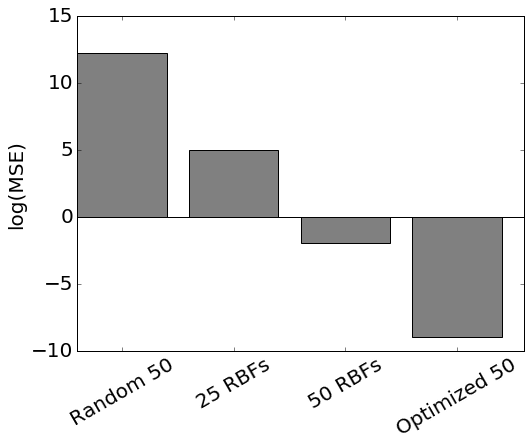

In [88]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(4), np.log([MSE2,MSE3,MSE1,MSE4]),color='grey')
plt.xticks(np.arange(4)+0.4, ('Random 50', '25 RBFs', '50 RBFs', 'Optimized 50'),rotation=30)
plt.axhline(y=0,color='black')
plt.ylabel('log(MSE)',fontsize=20)

In [149]:
### making prediction!
#with fitted RBF and weights from above~

tt = 2000  #600
xyz_ini = np.random.rand(3)
xyz_targ = np.zeros((tt,3))
xyz_targ[0,:] = xyz_ini

xyz_rec = np.zeros((tt,3))
xyz_rec[0,:] = xyz_ini
xyz_n = np.zeros((tt,3))
xyz_n[0,:] = xyz_ini
xyz_op = np.zeros((tt,3))
xyz_op[0,:] = xyz_ini

for ts in range(tt-1):
    
    #target
    dx,dy,dz = Lorenz(xyz_targ[ts,:], dt)
    xyz_targ[ts+1,:] = xyz_targ[ts,:] + [dx,dy,dz]
    
    #reconstruction
    GG = _calculate_interpolation_matrix(centroids_i, np.expand_dims(xyz_rec[ts,:],axis=1).T, n_RBF)
    temp = np.dot(GG, Wg)
    xyz_rec[ts+1,:] = xyz_rec[ts,:] + temp
    
#     GG = _calculate_interpolation_matrix(centroids_25, np.expand_dims(xyz_n[ts,:],axis=1).T, 25)
#     temp = np.dot(GG, nWg)
#     xyz_n[ts+1,:] = xyz_n[ts,:] + temp
    GG = _calculate_interpolation_matrix(opt_c, np.expand_dims(xyz_op[ts,:],axis=1).T, n_RBF)
    temp = np.dot(GG, optWg)
    xyz_op[ts+1,:] = xyz_op[ts,:] + temp
    

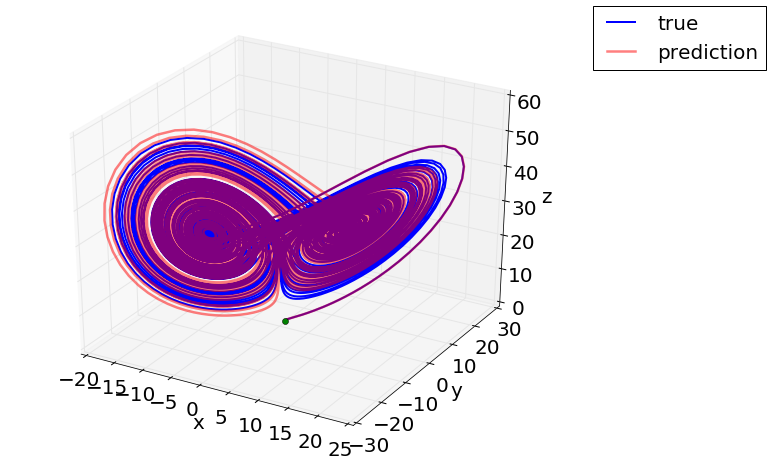

In [63]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot(xyz_targ[:,0], xyz_targ[:,1], xyz_targ[:,2],linewidth=2, label='true')
ax.hold(True)
ax.plot(xyz_rec[:,0], xyz_rec[:,1], xyz_rec[:,2],'r',alpha=0.5,linewidth=2.5, label='prediction')
ax.plot(np.expand_dims(xyz_ini[0],axis=0),np.expand_dims(xyz_ini[1],axis=0),np.expand_dims(xyz_ini[2],axis=0),'o')

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)

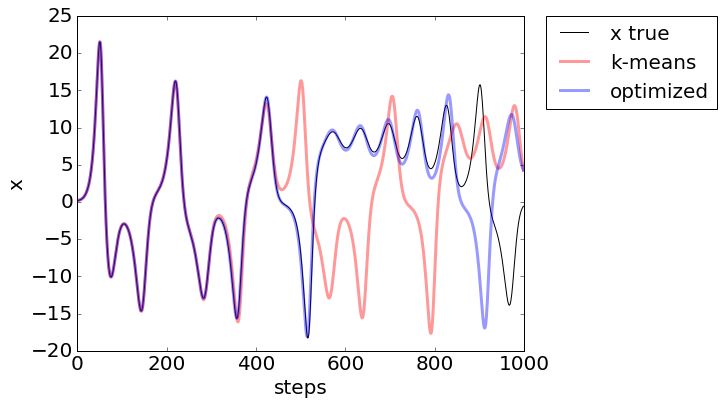

In [27]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.figure(figsize=(8,6))
plt.plot(xyz_targ[:,0], 'k', label='x true')
plt.hold(True)
#plt.plot(xyz_rec[:,0],'r',alpha=0.4, label='x prediction',linewidth=3)
plt.plot(xyz_rec[:,0],'r',alpha=0.4, label='k-means',linewidth=3)
#plt.plot(xyz_n[:,0],'g',alpha=0.4, label='random',linewidth=3)
plt.plot(xyz_op[:,0],'b',alpha=0.4, label='optimized',linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.xlabel('steps',fontsize=20)
plt.ylabel('x',fontsize=20)

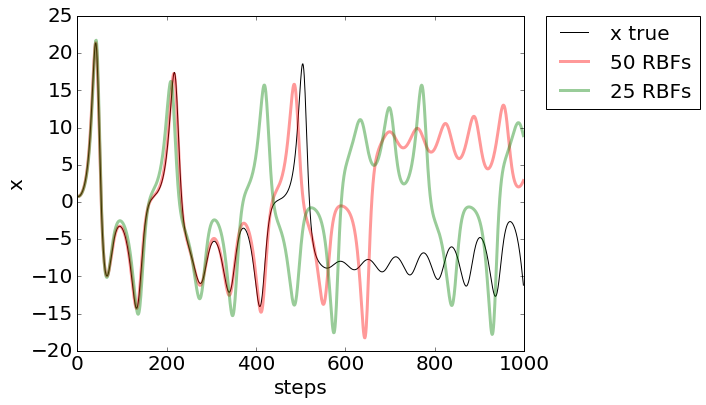

In [58]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.figure(figsize=(8,6))
plt.plot(xyz_targ[:,0], 'k', label='x true')
plt.hold(True)
#plt.plot(xyz_rec[:,0],'r',alpha=0.4, label='x prediction',linewidth=3)
plt.plot(xyz_rec[:,0],'r',alpha=0.4, label='50 RBFs',linewidth=3)
plt.plot(xyz_n[:,0],'g',alpha=0.4, label='25 RBFs',linewidth=3)
#plt.plot(xyz_op[:,0],'b',alpha=0.4, label='optimized',linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.xlabel('steps',fontsize=20)
plt.ylabel('x',fontsize=20)

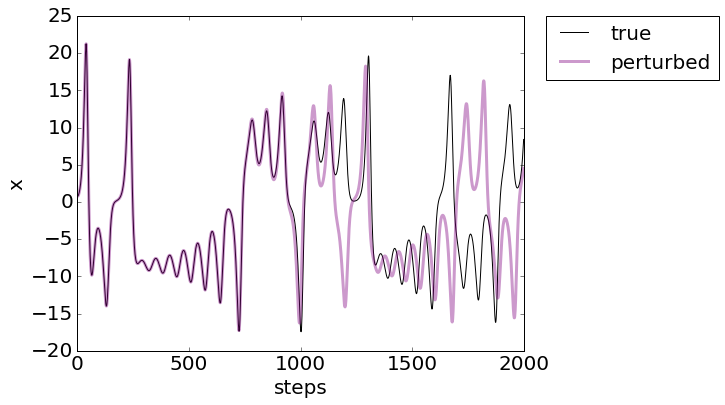

In [120]:
### Divergence of trajectroy

tt = 2000  #600
xyz_ini = np.random.rand(3)
xyz_targ = np.zeros((tt,3))
xyz_targ[0,:] = xyz_ini

xyz_n = np.zeros((tt,3))
xyz_n[0,:] = xyz_ini+np.random.randn(3)*0.001

for ts in range(tt-1):

    dx,dy,dz = Lorenz(xyz_targ[ts,:], dt)
    xyz_targ[ts+1,:] = xyz_targ[ts,:] + [dx,dy,dz]
    
    dx,dy,dz = Lorenz(xyz_n[ts,:], dt)
    xyz_n[ts+1,:] = xyz_n[ts,:] + [dx,dy,dz]
    
plt.figure(figsize=(8,6))
plt.plot(xyz_targ[:,0], 'k', label='true')
plt.hold(True)
plt.plot(xyz_n[:,0],color='purple',alpha=0.4, label='perturbed',linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.xlabel('steps',fontsize=20)
plt.ylabel('x',fontsize=20)

In [281]:
###Lyaponuv exponent!

def dd(series,i,j):
    return abs(series[i]-series[j])

series = xyz_targ[:,1]
#series = xyz_op[:,1]
eps=0.02
N=len(series)
dlist=[[] for i in range(N)]
n=0 #number of nearby pairs found
for i in range(N):
    for j in range(i+1,N):
        if dd(series,i,j) < eps:
            n+=1
            for k in range(min(N-i,N-j)):
                dlist[k].append(np.log(dd(series,i+k,j+k)))

2614

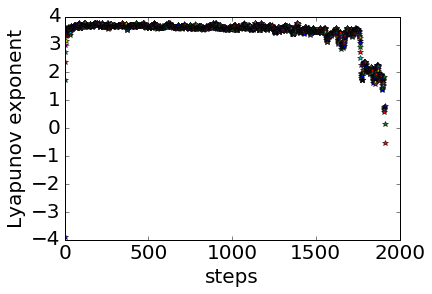

In [282]:
for ii in range(len(dlist)-2):
    if len(dlist[ii]) is not 0:
        plt.plot(ii,np.max(dlist[ii]),'*')
        plt.hold(True)
plt.xlabel('steps',fontsize=20)
plt.ylabel('Lyapunov exponent',fontsize=20)
n

array([ 0.32      ,  0.31999574,  0.31998726, ...,  0.6316457 ,
        0.6341838 ,  0.63668304])

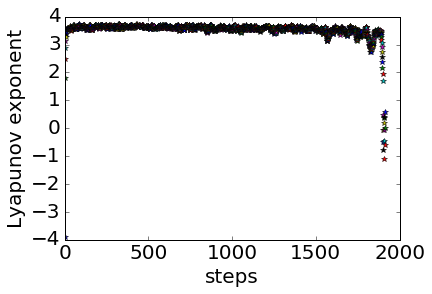

In [280]:
for ii in range(len(dlist)-2):
    if len(dlist[ii]) is not 0:
        plt.plot(ii,np.max(dlist[ii]),'*')
        plt.hold(True)
plt.xlabel('steps',fontsize=20)
plt.ylabel('Lyapunov exponent',fontsize=20)
n

# H-H model (with embedding of voltage)

In [2]:
def HHmodel(duration, dt, I):
    '''
    HHmodel function recieves input "duration" for the total simulation duration (in ms unit) and dt as the time steps.
    I is a vector with the same length as np.arange(0,duration,dt) that is input current through time.
    
    The retuned value is V, the vector that contains voltage from HHmodel throught time.
    Note that all the coefficients of H-H model follow those show in the work sheet. Validity check can be performed
    by editing parameters such as conductances outside the function or coefficients in the function.
    (remember to change it back if editted!)
    '''
    gN = 120 #mmho/cm2
    gK = 36 #mmho/cm2
    gL = 0.3 #mmho/cm2
    VN = 50 #mV
    VK = -77 #mV
    VL = -54.4 #mV
    C = 1 #μF/cm2

    dt = dt
    t = np.arange(0,duration,dt)
    V = np.zeros(len(t))
    V[0] = -65 #initialize at resting potential
    n = np.zeros(len(t)) #set initial condition to our steady-state values
    n[0] = 0.32
    m = np.zeros(len(t))
    m[0] = 0.05
    h = np.zeros(len(t))
    h[0] = 0.59
    #iteration
    for i in range(1,len(t)):
        V[i] = V[i-1] + dt*(I[i] - gN*m[i-1]**3*h[i-1]*(V[i-1]-VN) - gK*n[i-1]**4*(V[i-1]-VK) - gL*(V[i-1]-VL))/C
        n[i] = n[i-1] + dt*((1-n[i-1])*(0.01*(V[i-1]+55)/(1-np.exp(-(V[i-1]+55)/10))) - n[i-1]*(0.125*np.exp(-(V[i-1]+65)/80)))
        m[i] = m[i-1] + dt*((1-m[i-1])*(0.1*(V[i-1]+40)/(1-np.exp(-(V[i-1]+40)/10))) - m[i-1]*(4*np.exp(-(V[i-1]+65)/18)))
        h[i] = h[i-1] + dt*((1-h[i-1])*(0.07*np.exp(-(V[i-1]+65)/20)) - h[i-1]*(1/(1+np.exp(-(V[i-1]+35)/10))))
    return V, n, m, h

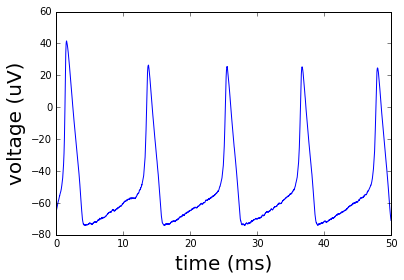

In [3]:
###voltage traces
dur = 50
dt = 0.01
temp = np.arange(0,dur,dt)
II = np.random.randn(len(temp))*10+20
V, n, m, h = HHmodel(dur,dt,II)
plt.plot(temp,V)
plt.xlabel('time (ms)',fontsize=20)
plt.ylabel('voltage (uV)',fontsize=20)

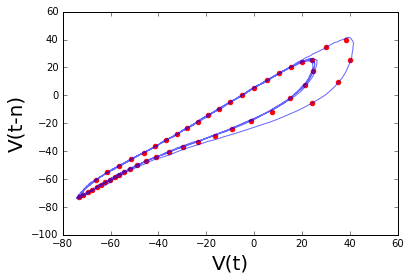

In [6]:
###embedding step
nn = 10
plt.plot(V[nn:],V[:-nn],alpha=0.6)

v1 = V[nn:]
v2 = V[:-nn]

plt.scatter(centroids_i[:,0], centroids_i[:, 1], color='r');
plt.xlabel('V(t)',fontsize=20)
plt.ylabel('V(t-n)',fontsize=20)

In [5]:
from sklearn.cluster import KMeans
def ini_centroids(vv,ww,n_RBF):
    kmeans_vw = KMeans(n_clusters = n_RBF, random_state=0).fit(np.hstack((vv.reshape(-1, 1), ww.reshape(-1,1))))
    sigma_mean = np.mean(sp.spatial.distance.pdist(kmeans_vw.cluster_centers_))
    centroids_i = kmeans_vw.cluster_centers_
    return centroids_i, sigma_mean

###Parameters for the centroids
# Kmeans for the centers and the sigmoids 
n_RBF = 50  #number of radial basis functions in the network
dim = 2  #FHN is 2-D

###visualize the centroids
centroids_i, sigma_mean = ini_centroids(v1,v2,n_RBF)

In [8]:
###pre-processing for optimization function~
x0 = np.reshape(centroids_i,(-1,1))  ###since 'sp.optimization' reshapes like this!!!!!
v1o = v1[:-1]
v1n = v1[1:]
v2o = v2[:-1]
v2n = v2[1:]
grids = np.concatenate((v1o.reshape(-1, 1).T, v1o.reshape(-1, 1).T)).T  #xt in the equation
iteration = np.concatenate((v1n.reshape(-1, 1).T-v1o.reshape(-1, 1).T, v2n.reshape(-1,1).T-v2o.reshape(-1, 1).T)).T  #delta x in the equation
bnds = ((-100, 100),) * (n_RBF*dim)  #to speed up computaion (dynamic range of FHN)



In [9]:
###optimization!!!
res = sp.optimize.minimize(RBFN_MSE, x0, args=(grids, iteration, n_RBF, dim), bounds=bnds, options=dict({'maxiter':100}))


In [15]:
opt_c = np.reshape(res.x,(n_RBF,dim))

v1i = v1[:-1] #intial positions
v1d = np.diff(v1) #differential predicted
v2i = v2[:-1]
v2d = np.diff(v2)
Xt = np.concatenate((v1i.reshape(-1, 1).T, v2i.reshape(-1,1).T)).T  #'design matrix' with initial positions
dX = np.concatenate((v1d.reshape(-1, 1).T, v2d.reshape(-1,1).T)).T  #trained with the iterated differentials

Wg, pred = fit_pred(centroids_i, Xt, dX, n_RBF, dim)
#Wg, pred = fit_pred(opt_c, Xt, dX, n_RBF, dim)
MSE = np.linalg.norm(pred - dX)**2
print(MSE)

101.4041062


In [263]:
tt = 10000
cort = 1000
vv_ini = [v1[0],v2[0]]#[-50,-50]
vv_rec = np.zeros((tt,2))
vv_rec[0,:] = vv_ini
crrt = []
rec = 0

for ts in range(tt-1):
    
    GG = _calculate_interpolation_matrix(centroids_i, np.expand_dims(vv_rec[ts,:],axis=1).T, n_RBF)
    temp = np.dot(GG, Wg)
    
    rec = rec + 1
    if rec%cort==0:#ts%cort == 0:
        vv_rec[ts,:] = [v1[ts],v2[ts]]  #every n steps~
        crrt.append(ts)
        rec = 0

    vv_rec[ts+1,:] = vv_rec[ts,:] + temp# + II[ts]*dt# 

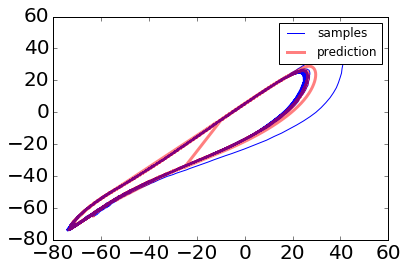

In [264]:
plt.plot(v1,v2, label='samples')
plt.hold(True)
plt.plot(vv_rec[:,0],vv_rec[:,1],'r',alpha=0.5, label='prediction',linewidth=3)
plt.legend()

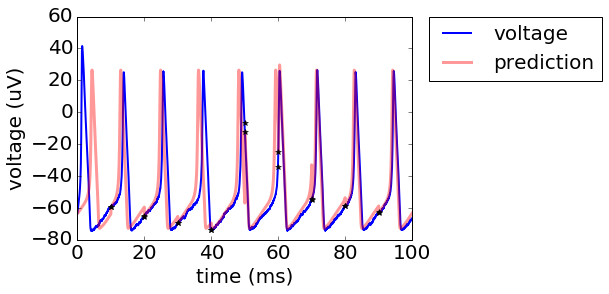

In [265]:
#plt.plot(np.arange(0,tt*dt,dt),v1[:tt], label='voltage',linewidth=2)
TT = np.arange(0,tt*dt,dt)
plt.plot(TT,v1[:tt], label='voltage',linewidth=2)
plt.hold(True)
#plt.plot(np.arange(0,tt*dt,dt),vv_rec[:,0],'r',alpha=0.4, label='prediction',linewidth=3)
plt.plot(TT,vv_rec[:,0],'r',alpha=0.4, label='prediction',linewidth=3)
plt.plot(TT[crrt],vv_rec[crrt],'k*')
plt.xlabel('time (ms)',fontsize=20)
plt.ylabel('voltage (uV)',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)

In [79]:
#scan embeddings
nns = [1,10,50,100,200]
for ns in nns:
    v1 = V[ns:]
    v2 = V[:-ns]
    
    centroids_i, sigma_mean = ini_centroids(v1,v2,n_RBF)
    
    v1i = v1[:-1] #intial positions
    v1d = np.diff(v1) #differential predicted
    v2i = v2[:-1]
    v2d = np.diff(v2)
    Xt = np.concatenate((v1i.reshape(-1, 1).T, v2i.reshape(-1,1).T)).T  #'design matrix' with initial positions
    dX = np.concatenate((v1d.reshape(-1, 1).T, v2d.reshape(-1,1).T)).T  #trained with the iterated differentials
    
    Wg, pred = fit_pred(centroids_i, Xt, dX, n_RBF, dim)
    MSE = np.linalg.norm(pred - dX)**2
    print(MSE)

735.975799851
990.294502817
1015.47200277
1044.78480939
1928.342278


# Worm data

In [314]:
import scipy.io as sio
matt = sio.loadmat('wormbrain.mat')

In [315]:
dF_F = matt['dF_F']
ss = matt['ss']
p1t = matt['p1t']
p2t = matt['p2t']
p3t = matt['p3t']

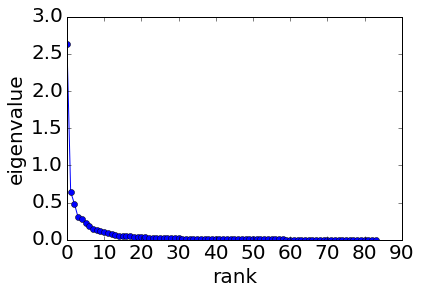

In [371]:
plt.plot(ss,'-o')
plt.xlabel('rank',fontsize=20)
plt.ylabel('eigenvalue',fontsize=20)

In [321]:
p1t.shape

(1, 3351)

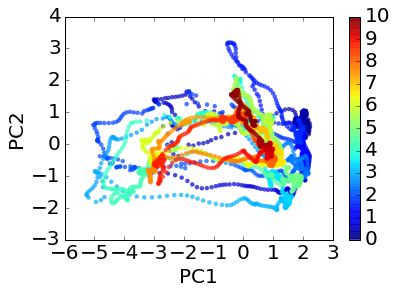

In [328]:
#plt.plot(p1t.T,p2t.T,linewidth=3,color='blue',alpha=0.7);
import matplotlib.cm as cm
cmap = cm.jet
c = np.linspace(0, 10, p1t.shape[1])
plt.scatter(p1t.T, p2t.T, c=c, cmap=cmap,edgecolors=None,linewidths=0,alpha=0.7)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.colorbar()

In [349]:
###Parameters for the centroids
# Kmeans for the centers and the sigmoids 
n_RBF = 50  #number of radial basis functions in the network
dim = 2  #FHN is 2-D

###visualize the centroids
centroids_i, sigma_mean = ini_centroids(p1t,p2t,n_RBF)

###fitting
p1i = np.squeeze(p1t[0,:-1].T) #intial positions
p1d = np.squeeze(np.diff(p1t))#differential predicted
p2i = np.squeeze(p2t[0,:-1].T)
p2d = np.squeeze(np.diff(p2t))
Xt = np.concatenate((p1i.reshape(-1, 1).T, p2i.reshape(-1,1).T)).T  #'design matrix' with initial positions
dX = np.concatenate((p1d.reshape(-1, 1).T, p2d.reshape(-1,1).T)).T  #trained with the iterated differentials

Wg, pred = fit_pred(centroids_i, Xt, dX, n_RBF, dim)
MSE = np.linalg.norm(pred - dX)**2
print(MSE)


48.9937540897


In [366]:
###prediction
tt = p1t.shape[1]
cort = 500
w_ini = [p1t[0,0],p2t[0,0]] #[-50,-50]
w_rec = np.zeros((tt,2))
w_rec[0,:] = w_ini
crrt = []
rec = 0

for ts in range(tt-1):
    
    GG = _calculate_interpolation_matrix(centroids_i, np.expand_dims(w_rec[ts,:],axis=1).T, n_RBF)
    temp = np.dot(GG, Wg)
    
    rec = rec + 1
    if rec%cort==0:#ts%cort == 0:
        w_rec[ts,:] = [p1t[0,ts],p2t[0,ts]]  #every n steps~
        crrt.append(ts)
        rec = 0

    w_rec[ts+1,:] = w_rec[ts,:] + temp# + II[ts]*dt# 


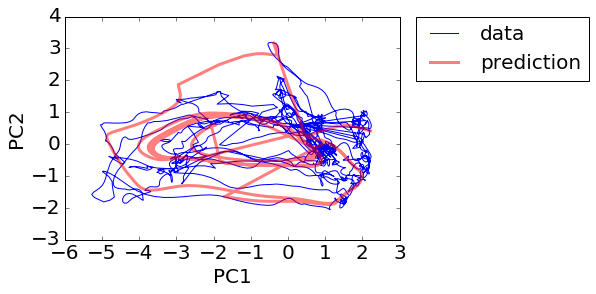

In [374]:
plt.plot(p1t.T,p2t.T, label='data')
plt.hold(True)
plt.plot(w_rec[:,0],w_rec[:,1],'r',alpha=0.5, label='prediction',linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)

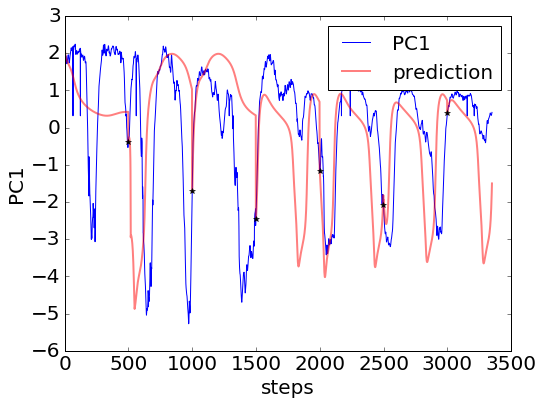

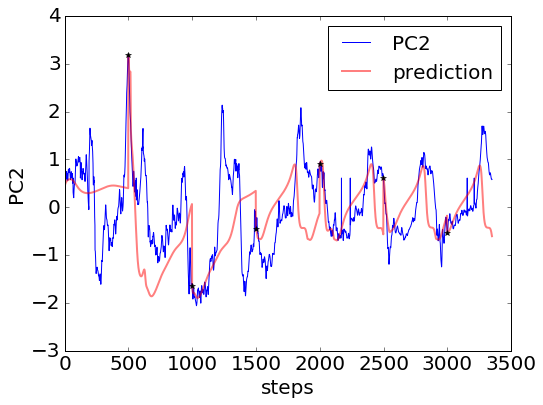

In [385]:
plt.figure(figsize=(8,6))
plt.plot(p1t.T,'b',label='PC1')
plt.hold(True)
plt.plot(w_rec[:,0],linewidth=2,alpha=0.5,color='r',label='prediction')
plt.plot(crrt,w_rec[crrt,0],'k*')
plt.legend(fontsize=20)
plt.xlabel('steps',fontsize=20)
plt.ylabel('PC1',fontsize=20)

plt.figure(figsize=(8,6))
plt.plot(p2t.T,'b',label='PC2')
plt.hold(True)
plt.plot(w_rec[:,1],linewidth=2,alpha=0.5,color='r',label='prediction')
plt.plot(crrt,w_rec[crrt,1],'k*')
plt.legend(fontsize=20)
plt.xlabel('steps',fontsize=20)
plt.ylabel('PC2',fontsize=20)